Pesos ótimos para o portfólio de máximo Sharpe Ratio:
    Ticker    Weight
0    AAPL  0.009050
1    MSFT  0.022952
2   GOOGL  0.108367
3    AMZN  0.043821
4    TSLA  0.005845
5    META  0.018633
6    NFLX  0.005844
7    NVDA  0.014012
8     JPM  0.003288
9       V  0.105081
10    BAC  0.068459
11     MA  0.049716
12    DIS  0.098424
13   PYPL  0.019716
14   INTC  0.111968
15   CSCO  0.094755
16   ADBE  0.005933
17     KO  0.021008
18    PFE  0.095483
19      T  0.097646


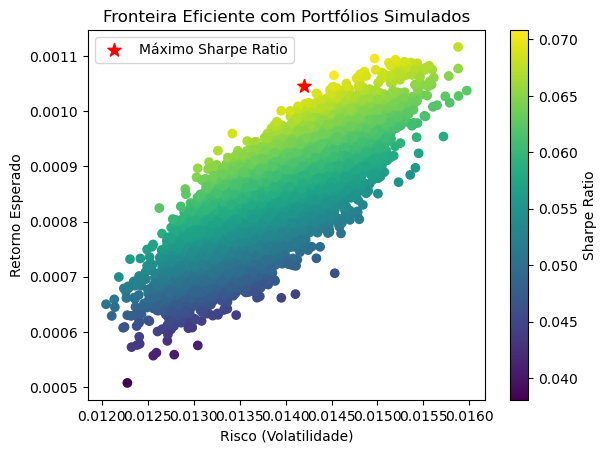

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('historical_data_2000_to_today.csv')

# Selecionar as ações para análise
tickers = df['Ticker'].unique()
df_selected = df[df['Ticker'].isin(tickers)]

# Converter a coluna Date para o formato datetime
df_selected['Date'] = pd.to_datetime(df_selected['Date'])

# Preparar os dados para análise: pivot para calcular retornos
df_selected = df_selected.pivot(index='Date', columns='Ticker', values='Close')
returns = df_selected.pct_change().dropna()

# Calcular o retorno esperado e a matriz de covariância dos retornos
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Função de simulação de portfólios usando a técnica de Monte Carlo
def simulate_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    """
    Simula portfólios aleatórios para encontrar a combinação ótima de pesos.

    Parâmetros:
    - num_portfolios (int): Número de portfólios simulados.
    - mean_returns (pd.Series): Retornos esperados dos ativos.
    - cov_matrix (pd.DataFrame): Matriz de covariância dos retornos.
    - risk_free_rate (float): Taxa livre de risco (diária).

    Retorna:
    - results (np.ndarray): Matriz com retorno, desvio padrão e Sharpe Ratio dos portfólios simulados.
    - weights_record (list): Lista de arrays com os pesos de cada ativo em cada portfólio.
    """
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        weights_record.append(weights)

        portfolio_return = np.sum(mean_returns * weights)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_stddev  # Sharpe Ratio

    return results, weights_record

# Parâmetros da simulação
num_portfolios = 10000
risk_free_rate = 0.01 / 252  # Exemplo: taxa livre de risco anual de 1%, convertida para diária

# Executar a simulação de Monte Carlo
results, weights_record = simulate_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

# Encontrar o portfólio com o maior Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_risk = results[1, max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

# Exibir os pesos ótimos
portfolio = pd.DataFrame({'Ticker': tickers, 'Weight': optimal_weights})
print("Pesos ótimos para o portfólio de máximo Sharpe Ratio:\n", portfolio)

# Visualizar a fronteira eficiente e o portfólio ótimo
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risco (Volatilidade)')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente com Portfólios Simulados')

# Destacar o portfólio com maior Sharpe Ratio
plt.scatter(max_sharpe_risk, max_sharpe_return, color='red', marker='*', s=100, label='Máximo Sharpe Ratio')
plt.legend()
plt.show()
